In [1]:
# Part 1: Data Import and Log Returns Calculation
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
tickers = ['META', 'MSFT', 'XOM', '^GSPC']
start = '2013-01-01'
end = '2024-12-31'

raw_data = yf.download(tickers, start=start, end=end)

# Extract 'Close' prices if multiindex
if isinstance(raw_data.columns, pd.MultiIndex):
    data = raw_data['Close']
else:
    data = raw_data

# Compute log returns
data_returns = np.log(data / data.shift(1)).dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [2]:
# Define major market events
events = pd.DataFrame({
    'Date': pd.to_datetime([
        '2015-08-24',  # China Market Crash
        '2016-06-24',  # Brexit Vote
        '2018-10-10',  # Market Correction
        '2020-03-16',  # COVID-19 Crash
        '2021-01-27',  # GameStop Short Squeeze
        '2021-11-10',  # Inflation Surge Start
        '2022-12-14',  # Inflation Cooldown
        '2018-12-19',  # Fed Rate Hike
        '2019-07-31',  # Fed Rate Cut
        '2019-08-05',  # US-China Trade War
    ]),
    'Event': [
        'China Market Crash',
        'Brexit Vote',
        'Market Correction',
        'COVID-19 Crash',
        'GameStop Short Squeeze',
        'Inflation Surge Start',
        'Inflation Cooldown',
        'Fed Rate Hike',
        'Fed Rate Cut',
        'US-China Trade War'
    ]
}).set_index('Date')

# Display to verify
print(events)

                             Event
Date                              
2015-08-24      China Market Crash
2016-06-24             Brexit Vote
2018-10-10       Market Correction
2020-03-16          COVID-19 Crash
2021-01-27  GameStop Short Squeeze
2021-11-10   Inflation Surge Start
2022-12-14      Inflation Cooldown
2018-12-19           Fed Rate Hike
2019-07-31            Fed Rate Cut
2019-08-05      US-China Trade War


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

results = []

# For each event, calculate pre/post return differences and perform t-tests
for event_date, event_row in events.iterrows():
    pre_event = data_returns.loc[:event_date].iloc[-30:]
    post_event = data_returns.loc[event_date:].iloc[:30]

    for stock in ['META', 'MSFT', 'XOM']:
        pre_mean = pre_event[stock].mean()
        post_mean = post_event[stock].mean()
        pre_vol = pre_event[stock].std()
        post_vol = post_event[stock].std()

        # Perform t-test for difference in means
        from scipy.stats import ttest_ind
        t_stat, p_val = ttest_ind(pre_event[stock], post_event[stock])

        results.append({
            'Event': events.loc[event_date, 'Event'],
            'Stock': stock,
            'PreMeanReturn': pre_mean,
            'PostMeanReturn': post_mean,
            'PreVolatility': pre_vol,
            'PostVolatility': post_vol,
            'P-Value': p_val
        })

results_df = pd.DataFrame(results)

In [4]:
from statsmodels.stats.multitest import multipletests

results_df['Significant (FDR)'] = multipletests(results_df['P-Value'], alpha=0.05, method='fdr_bh')[0]
print(results_df.head(10))

                Event Stock  PreMeanReturn  PostMeanReturn  PreVolatility  \
0  China Market Crash  META      -0.003103        0.002945       0.022050   
1  China Market Crash  MSFT      -0.002733        0.002647       0.017707   
2  China Market Crash   XOM      -0.005749        0.002095       0.018276   
3         Brexit Vote  META      -0.002354        0.002796       0.009801   
4         Brexit Vote  MSFT      -0.000873        0.003675       0.014420   
5         Brexit Vote   XOM      -0.000104       -0.001576       0.008397   
6   Market Correction  META      -0.005072       -0.005864       0.016469   
7   Market Correction  MSFT      -0.001263       -0.003146       0.014906   
8   Market Correction   XOM       0.001716       -0.003559       0.009148   
9      COVID-19 Crash  META      -0.010805        0.003211       0.046036   

   PostVolatility   P-Value  Significant (FDR)  
0        0.022200  0.294070              False  
1        0.021076  0.288789              False  
2    

In [5]:
results_df

,Event,Stock,PreMeanReturn,PostMeanReturn,PreVolatility,PostVolatility,P-Value,Significant (FDR)
0,China Market Crash,META,-0.003103,0.002945,0.022050,0.022200,0.294070,False
1,China Market Crash,MSFT,-0.002733,0.002647,0.017707,0.021076,0.288789,False
2,China Market Crash,XOM,-0.005749,0.002095,0.018276,0.020169,0.119862,False
3,Brexit Vote,META,-0.002354,0.002796,0.009801,0.013343,0.093783,False
4,Brexit Vote,MSFT,-0.000873,0.003675,0.014420,0.015793,0.248898,False
5,Brexit Vote,XOM,-0.000104,-0.001576,0.008397,0.012400,0.592375,False
6,Market Correction,META,-0.005072,-0.005864,0.016469,0.024861,0.884941,False
7,Market Correction,MSFT,-0.001263,-0.003146,0.014906,0.025995,0.731968,False
8,Market Correction,XOM,0.001716,-0.003559,0.009148,0.014584,0.098722,False
9,COVID-19 Crash,META,-0.010805,0.003211,0.046036,0.044845,0.237142,False


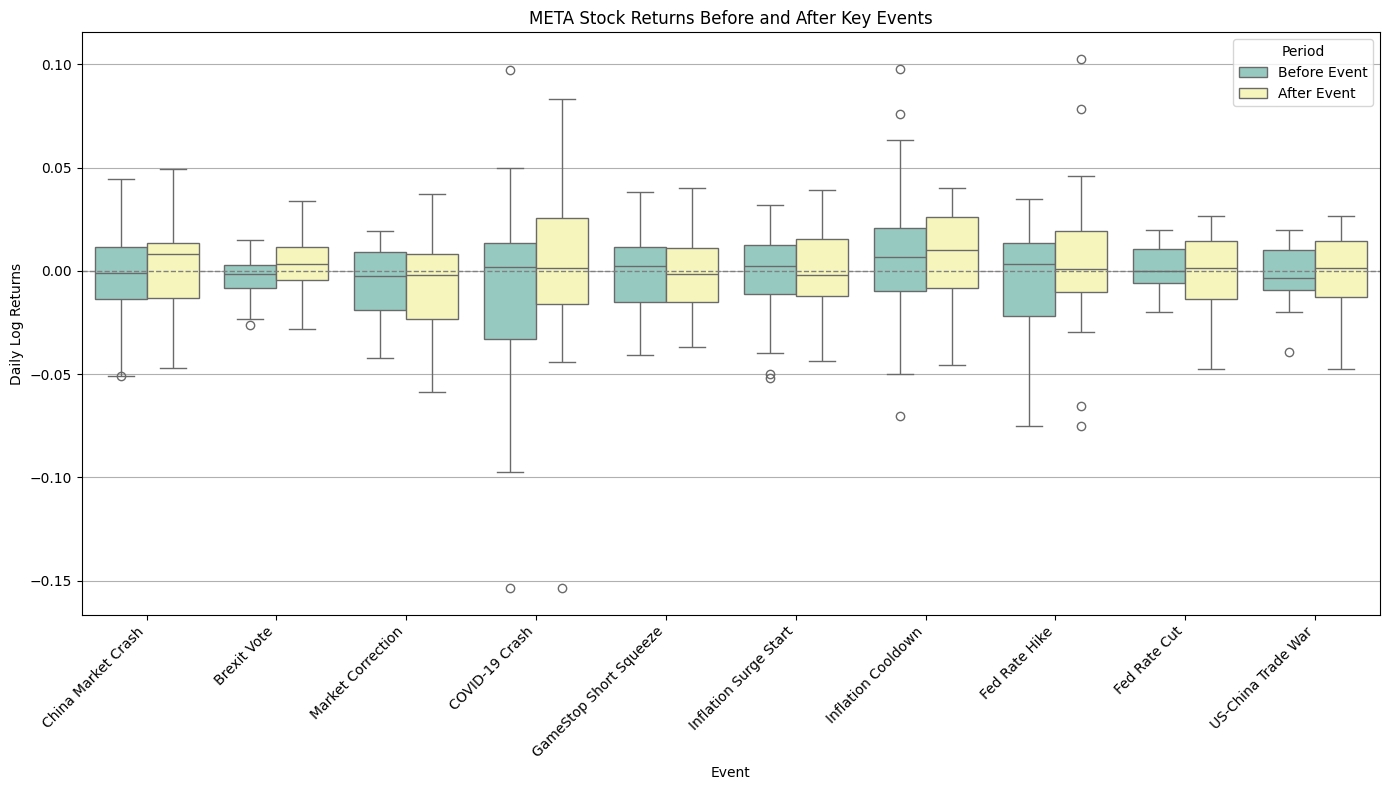

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data clearly
meta_event_returns = []

for event_date, event_row in events.iterrows():
    pre_event_returns = data_returns.loc[:event_date].iloc[-30:]['META']
    post_event_returns = data_returns.loc[event_date:].iloc[:30]['META']

    # Create dataframe for clear visualization
    meta_event_returns.append(pd.DataFrame({
        'Returns': np.concatenate([pre_event_returns.values, post_event_returns.values]),
        'Period': ['Before Event'] * 30 + ['After Event'] * 30,
        'Event': event_row['Event']
    }))

# Concatenate data clearly
all_meta_returns_df = pd.concat(meta_event_returns)

# Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x='Event', y='Returns', hue='Period', data=all_meta_returns_df, palette='Set3')

plt.title('META Stock Returns Before and After Key Events')
plt.xlabel('Event')
plt.ylabel('Daily Log Returns')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, linestyle='--', color='grey', linewidth=1)
plt.legend(title='Period')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

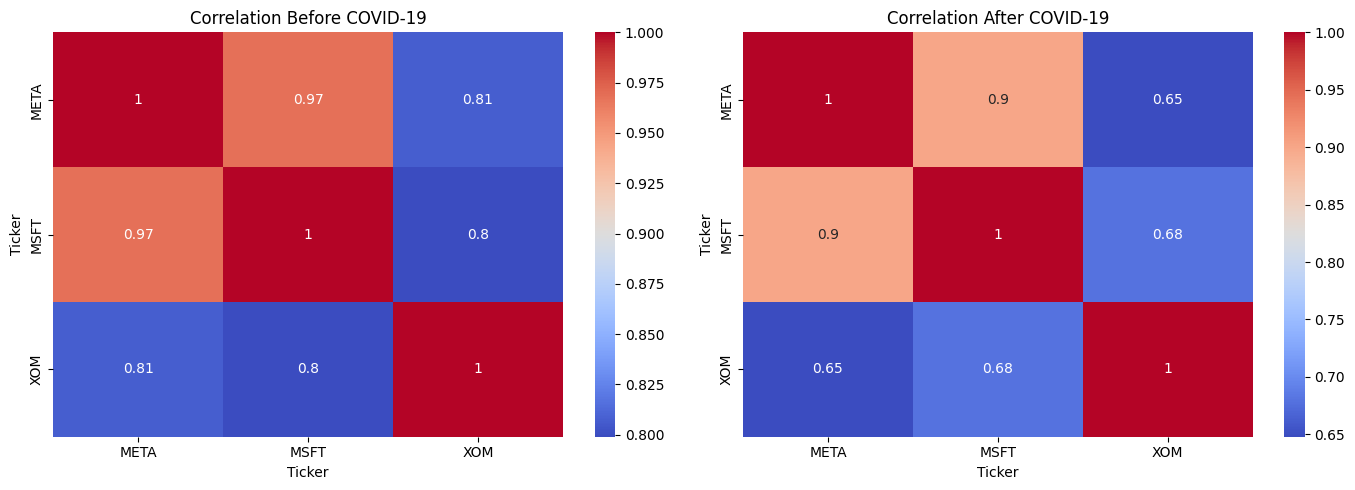

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: COVID-19 Crash
event_date = '2020-03-16'

pre_corr = data_returns.loc[:event_date].iloc[-30:][['META','MSFT','XOM']].corr()
post_corr = data_returns.loc[event_date:].iloc[:30][['META','MSFT','XOM']].corr()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(pre_corr, annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Correlation Before COVID-19')

sns.heatmap(post_corr, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation After COVID-19')

plt.tight_layout()
plt.show()

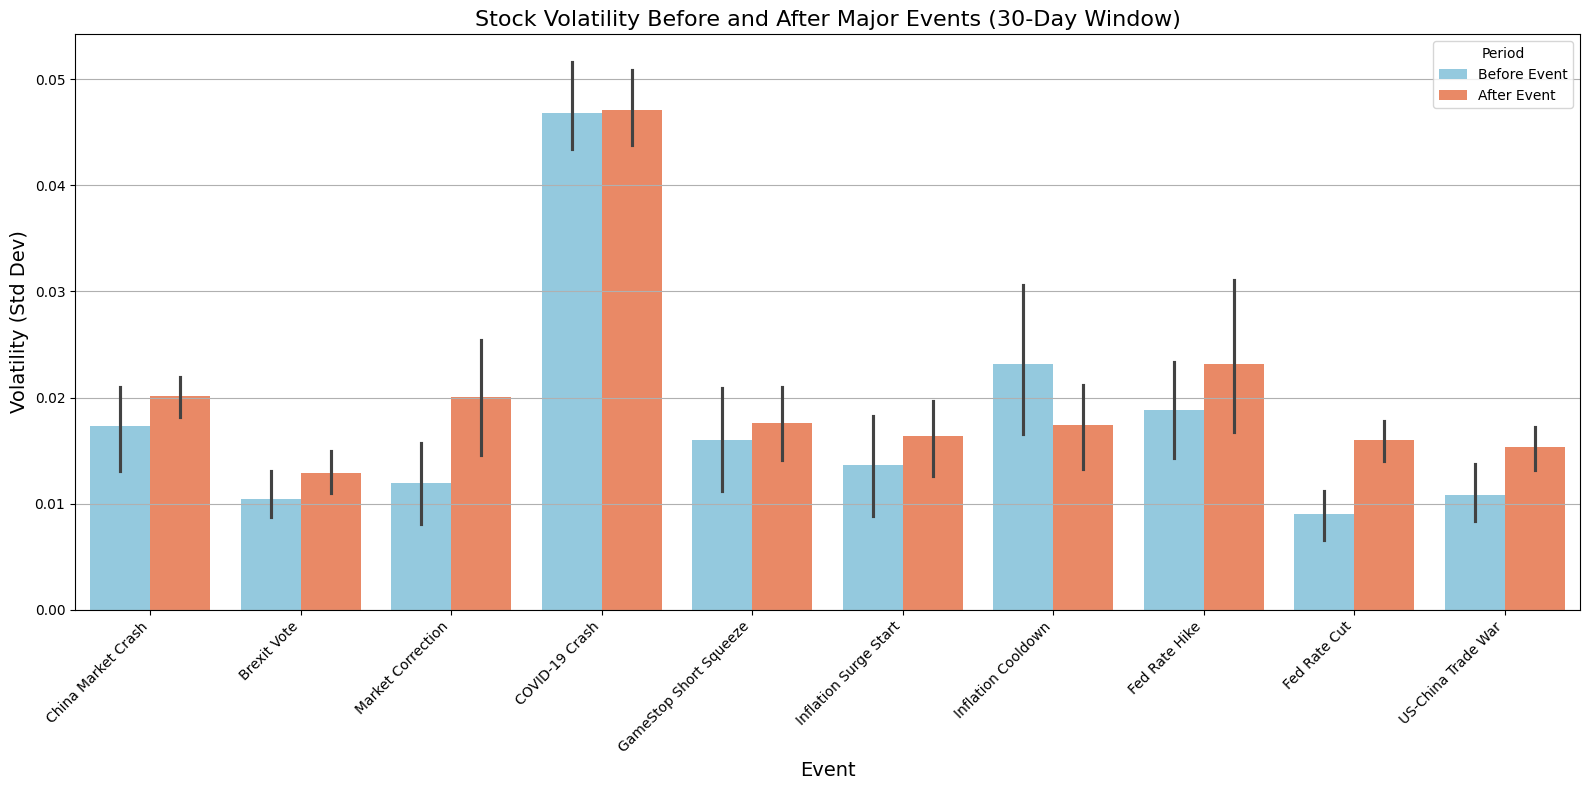

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare volatility data for each event
volatility_all_events = []

for event_date, event_row in events.iterrows():
    pre_vol = data_returns.loc[:event_date].iloc[-30:].std()
    post_vol = data_returns.loc[event_date:].iloc[:30].std()

    df_event_vol = pd.DataFrame({
        'Ticker': pre_vol.index,
        'Before Event': pre_vol.values,
        'After Event': post_vol.values,
        'Event': event_row['Event']
    })
    volatility_all_events.append(df_event_vol)

# Combine into a single DataFrame clearly
volatility_df_all = pd.concat(volatility_all_events)

# Reshape data for clear plotting
volatility_df_melted = pd.melt(volatility_df_all, id_vars=['Event', 'Ticker'],
                               value_vars=['Before Event', 'After Event'],
                               var_name='Period', value_name='Volatility')

# Plot clearly using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='Event', y='Volatility', hue='Period', data=volatility_df_melted, palette=['skyblue', 'coral'])

plt.title('Stock Volatility Before and After Major Events (30-Day Window)', fontsize=16)
plt.xlabel('Event', fontsize=14)
plt.ylabel('Volatility (Std Dev)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

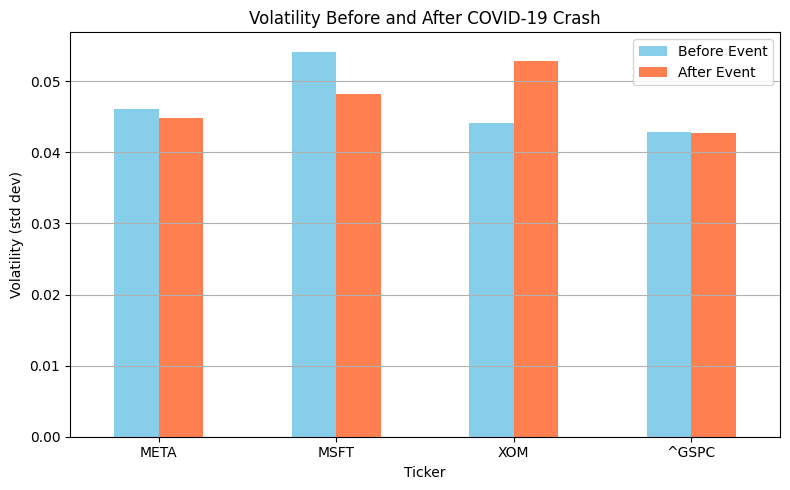

In [9]:
# Volatility specifically around COVID-19 event
rolling_vol_pre = data_returns.loc[:'2020-03-16'].iloc[-30:].std()
rolling_vol_post = data_returns.loc['2020-03-16':].iloc[:30].std()

volatility_df = pd.DataFrame({
    'Before Event': rolling_vol_pre,
    'After Event': rolling_vol_post
})

volatility_df.plot(kind='bar', figsize=(8,5), color=['skyblue', 'coral'])
plt.title('Volatility Before and After COVID-19 Crash')
plt.ylabel('Volatility (std dev)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('Volatility_comparison_COVID19.png', dpi=300)
plt.show()